In [182]:
import gensim
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.manifold import TSNE

In [183]:
df = pd.read_csv('/Users/jralston/git_proj/Scrapy_project_yelp/yelp/yelp_indian.csv')

In [184]:
df.head()

,address,date,price,rating,restaurant,text
0,"27 W 24th St, New York, NY 10010",7/6/2012,$$$,4,Junoon,Very pleased with my gdine purchase and great ...
1,"27 W 24th St, New York, NY 10010",1/6/2012,$$$,5,Junoon,so.....amazing!! this is the best indian food...
2,"27 W 24th St, New York, NY 10010",2/13/2012,$$$,2,Junoon,We went to Junoon expecting a Michelin starred...
3,"320 Park Ave, New York, NY 10020",7/14/2011,$$,1,Just Salad,This place is so cheap with the toppings! The...
4,"320 Park Ave, New York, NY 10020",3/19/2014,$$,2,Just Salad,I love the salads here. The quality of product...


In [185]:
#df_chote = df[df.restaurant == 'Chote Nawab']

In [186]:
df_halal = df[df.restaurant == 'The Halal Guys']

In [187]:
#restrict just to the restaurant Chote Nawab
df = df_halal

In [188]:
df.shape

(8731, 6)

In [189]:
#grab the reviews
reviews_list = list(df.text)

In [190]:
#tokenize the sentences
reviews = [word_tokenize(x) for x in reviews_list]

In [191]:
reviews[:2];

In [192]:
NLTKstopWords = set(stopwords.words('english'))

In [193]:
#remove stopwords
for i in range(len(reviews)):
    reviews[i] = [word for word in reviews[i] if word.lower() not in NLTKstopWords]

In [194]:
reviews[:2];

In [195]:
sentences = reviews

In [196]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


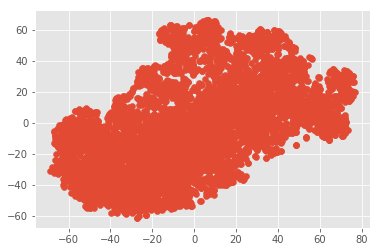

In [197]:
X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [136]:
word_vectors = model.wv
del model

In [204]:
word_vectors.most_similar('chicken')

[('chicken/lamb', 0.8288506865501404),
 ('falafel', 0.8043967485427856),
 ('beef', 0.7659741640090942),
 ('lamb', 0.7483056783676147),
 ('replaced', 0.740127444267273),
 ('combination', 0.7342527508735657),
 ('mixed', 0.7276734709739685),
 ('sandwich', 0.7218403816223145),
 ('lamb/chicken', 0.7218377590179443),
 ('combo-', 0.7193285226821899)]

In [213]:
word_vectors.most_similar('hour')

[('minute', 0.9430434107780457),
 ('mins', 0.9344289898872375),
 ('30', 0.9335503578186035),
 ('min', 0.9334684610366821),
 ('weather', 0.9209528565406799),
 ('45', 0.9206501245498657),
 ('waited', 0.9177675247192383),
 ('freezing', 0.9111607074737549),
 ('10-15', 0.9058060050010681),
 ('minutes', 0.9002691507339478)]

In [214]:
word_vectors.similarity('chicken', 'good')

0.330951698869229

In [224]:
word_vectors.similarity('chicken', 'good')

0.330951698869229

In [222]:
word_vectors.similarity('beef', 'good')

0.32514107436694173

In [215]:
word_vectors.similarity('fries', 'good')

0.2783760940101734

In [163]:
word_vectors.similarity('pork', 'good')

0.44856149890430697

In [176]:
word_vectors.similarity('sandwich', 'yum')

0.3505982146833708

In [177]:
word_vectors.similarity('platter', 'yum')

0.35414066973484937

In [170]:
word_vectors.similarity('hummus', 'good')

0.25692620091836404

In [167]:
word_vectors.similarity('falafel', 'good')

0.35249016312153625

In [216]:
word_vectors.similarity('good', 'bad')

0.7149759676887003

In [220]:
word_vectors.similarity('good', 'yummy')

0.685841348104375